In [1]:
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
class0_len = 1000
X0 = np.random.normal((0,1,2), (1,2,2), (class0_len,3))
y0 = [0]*class0_len

class1_len = 2000
X1 = np.random.normal((1,1,-1), (3,1,1), (class1_len, 3))
y1 = [1]*class1_len

In [4]:
X = np.concatenate((X0, X1))
y = y0+y1

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=24)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_val, y_val))

0.9146666666666666
0.9253333333333333


In [7]:
def perf_measure(y_actual, y_hat):
    return 

In [8]:
tp, fp, tn, fn = perf_measure(y_val, gnb.predict(X_val))

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
def print_metrics(tp, fp, tn, fn):
    pass

lets try to find drawbacks here

In [ ]:
print_metrics()

## HOMEWORK: think of example when all metrics are high, but model is bad

# F1-Score

<img src="./f1score.png">

In [ ]:
print('F1-Score: ', (tp)/(tp+(fp+fn)/2))

# ROC Curve, AUC

<img src="./roc_curve.jpeg">

In [ ]:
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)

In [9]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [10]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [11]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [14]:
lr_probs

array([9.95972685e-01, 9.97994843e-01, 5.29883066e-03, 1.52374194e-01,
       9.98333350e-01, 5.00061448e-01, 1.97631392e-02, 2.34633843e-02,
       9.82000697e-01, 7.06465180e-01, 4.16201961e-03, 7.46446600e-01,
       7.66567488e-03, 9.61958719e-01, 9.35214568e-01, 8.07653554e-01,
       1.44803886e-01, 9.56532321e-01, 1.56957507e-01, 9.44908759e-01,
       8.67007620e-01, 4.10282064e-01, 2.04815673e-02, 6.67093752e-01,
       4.26334713e-03, 9.56694469e-01, 6.92577362e-01, 9.94406759e-01,
       2.49159988e-02, 5.50542684e-01, 7.92214513e-01, 8.15242298e-01,
       8.18291856e-02, 8.23317999e-01, 1.53516867e-02, 7.98798532e-02,
       9.87551937e-01, 9.36923464e-01, 9.86339822e-01, 3.19318661e-01,
       9.82576369e-03, 3.82722802e-02, 9.83635286e-02, 9.83780221e-01,
       6.53737641e-03, 5.29530623e-01, 5.01616608e-01, 9.97760930e-01,
       8.40960809e-03, 1.42082825e-01, 2.21934800e-02, 6.47786780e-01,
       9.79115074e-01, 2.32942383e-01, 5.09205311e-02, 9.03776284e-01,
      

In [15]:
# calculate score
lr_auc = roc_auc_score(testy, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

Logistic: ROC AUC=0.903


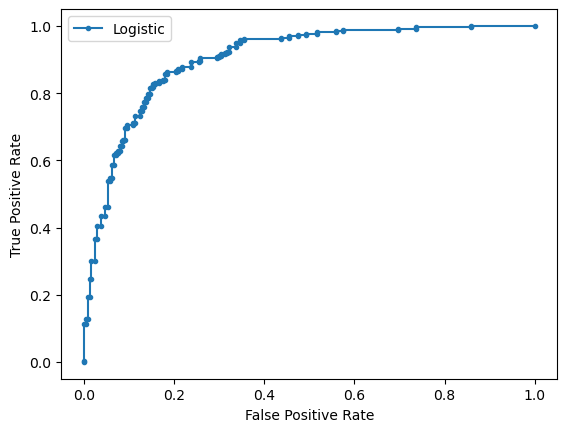

In [16]:
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

implement roc_auc_score and roc_curve functions on your own

In [37]:
from sklearn.metrics import confusion_matrix
def roc_curve(testy, lr_probs):
    threshold = np.linspace(0, 1, num=200)
    fpr = []
    tpr = []
    for i in threshold:
        y_pred = [1 if val>=i else 0 for val in lr_probs]
        tn, fp, fn, tp = confusion_matrix(testy,y_pred).ravel()
        fpr.append(fp/(fp+tn))
        tpr.append(tp/(tp+fn))
        
    return fpr, tpr

def roc_auc_score(testy, lr_probs):
    x, y = roc_curve(testy, lr_probs)
    auc = 0
    for i in range(1, len(x)):
        h = x[i] - x[i-1]
        auc += -h * (y[i-1] + y[i]) / 2
    return auc

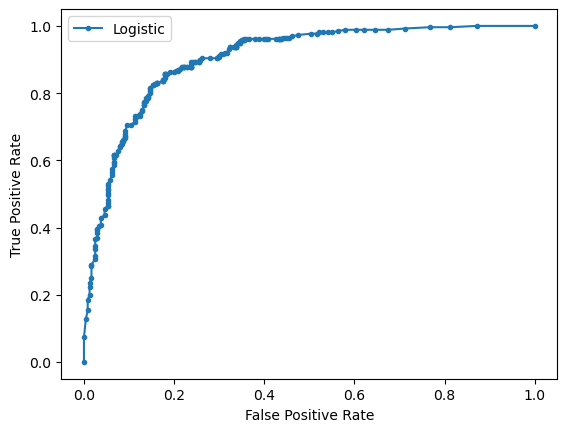

In [38]:
lr_fpr,lr_tpr =  roc_curve(testy, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [39]:
roc_auc_score(testy, lr_probs)

0.9028525641025644